In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

# Ex. 2

SIR model In 1927, W. O Kermack and A. G. McKendrick created a
model in which they considered a fixed population with three compartments: susceptible S, infected I and removed R. Analogous to the principles of reaction kinetics, they assumed that encounters between infected
and susceptible individuals occur at a rate proportional to their respective numbers in the population. The rate of new infections can thus be
defined as βSI, where β is a parameter for infectivity. Moreover, infected
individuals were assumed to recover with a constant probability at any
time, which translates into a constant per capita recovery rate that we
denote with r and thus an overall rate of recovery rI. The model may be
translated into the following set of differential equations:


$$\begin{cases} \frac{\operatorname{d}S}{\operatorname{d}t} = - \beta I S\\ \frac{\operatorname{d}I}{\operatorname{d}t} = \beta I S-rI\\ \frac{\operatorname{d}R}{\operatorname{d}t} = rI\end{cases}$$

A key parameter in epidemiology is the basic reproductive ratio R0. It is
defined as the average number of secondary cases transmitted by a single
infected individual that is placed into a fully susceptible population. R0
tells us something about the initial rate of spread of the disease. If R0 > 1,
there will be an epidemic and if R0 < 1, the introduced infected will
recover (or die) without being able to replace themselves by new infections.
In the above model it is pretty easy to derive R0. The disease-free state
corresponds to S = N, I = 0 and R = 0. If one infected individual appears
in the population, there will be an epidemic if and only if dI(t)/dt > 0.

By replacing S with N in the above equations this yields βN/r > 1. Thus
we take

$$ R_0 = \frac{\beta N}{r} $$

In [0]:
def sir_model(y, t, beta, r):
    S, I, R = y
    dydt = [-beta*S*I, beta*S*I - r*I, r*I] #equations
    return dydt

In [0]:
def sir2_model(y, t, beta, r):
    S, I = y
    dydt = [-beta*I*S, beta*I*S-r*I]  # equations
    return dydt

In [0]:
def solve(model, y0, t, args):
    sol = odeint(model, y0, t, args=args)
    return sol

In [0]:
def generate_plot(t, solution, labels):
    plt.figure(figsize = (10, 6))  
    for i in range(solution.shape[1]):
        plt.plot(t, solution[:, i], label=labels[i])
    
    plt.legend(loc='best')
    plt.xlabel('t')

## A

Check the formula for R0 by solving the model numerically for different sets of parameters. Fix N, and vary β and r. Choose your values
such as to have combinations with both R0 > 1 and R0 < 1. Run
the model for each parameter combination, plot the time evolution
of each compartment and record whether there was an epidemic or
not

### Initial conditions:

In [0]:
t = np.linspace(1, 30, 5000)

s0 = 0.99
i0 = 0.01
r0 = 0

In [7]:
beta = 0.8 
r = 1
args = (beta, r)
print(f'R0 = {beta/r}')

R0 = 0.8


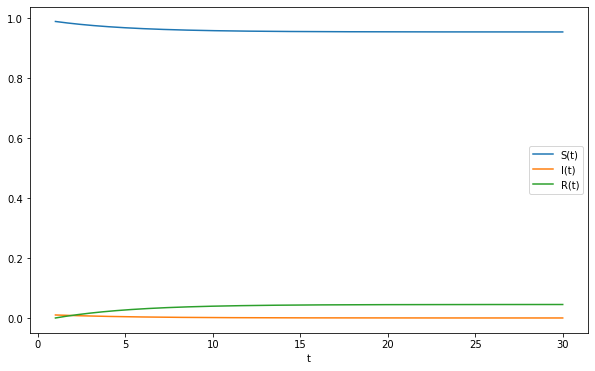

In [8]:
solution = solve(sir_model, [s0, i0, r0], t, args)
generate_plot(t, solution, labels = ['S(t)', 'I(t)', 'R(t)'])

In [9]:
beta =1
r = 1
args = (beta, r)
print(f'R0 = {beta/r}')

R0 = 1.0


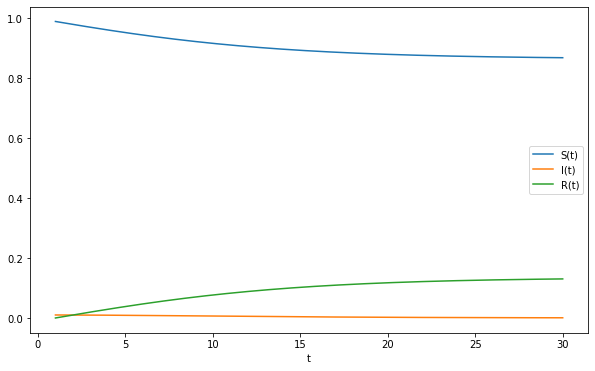

In [10]:
solution = solve(sir_model, [s0, i0, r0], t, args)
generate_plot(t, solution, labels = ['S(t)', 'I(t)', 'R(t)'])

In [11]:
beta = 1.3 
r = 1
args = (beta, r)
print(f'R0 = {beta/r}')

R0 = 1.3


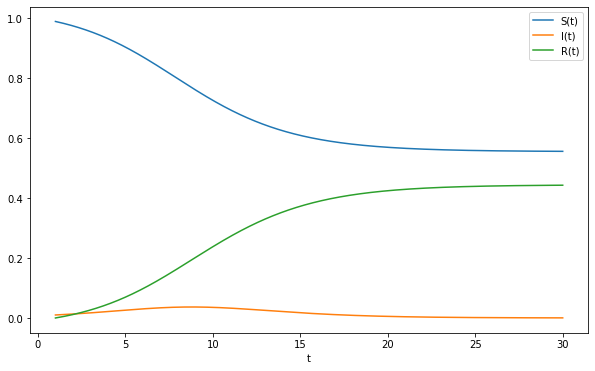

In [12]:
solution = solve(sir_model, [s0, i0, r0], t, args)
generate_plot(t, solution, labels = ['S(t)', 'I(t)', 'R(t)'])

# B

• Notice that the basic SIR model can be reduced to a two-dimensional
system, because the variable for recovered individuals does not appear in the equations of the other two variables. The reduced SI
system is thus given by:

$$\begin{cases} \frac{\operatorname{d}S}{\operatorname{d}t} = - \beta I S\\ \frac{\operatorname{d}I}{\operatorname{d}t} = \beta I S-rI\end{cases}$$

Phase portraits provide a powerful tool to visualize the dynamics of
ODE systems. For a fixed set of parameters, draw a phase portrait
with trajectories corresponding to different initial conditions.


In [0]:
def plot_phase_plane(ax, f, u_range, v_range, args=(), n_grid=50):
    u = np.linspace(u_range[0], u_range[1], n_grid)
    v = np.linspace(v_range[0], v_range[1], n_grid)
    uu, vv = np.meshgrid(u, v)

    # Compute derivatives
    u_vel = np.empty_like(uu)
    v_vel = np.empty_like(vv)
    for i in range(uu.shape[0]):
        for j in range(uu.shape[1]):
            u_vel[i,j], v_vel[i,j] = f(np.array([uu[i,j], vv[i,j]]), None, *args)

    speed = np.sqrt(u_vel**2 + v_vel**2)
    lw = 0.5 + 2.5 * speed / speed.max()

    ax.streamplot(uu, vv, u_vel, v_vel, linewidth=lw, arrowsize=1.2, density=1, color='blue')

    return ax

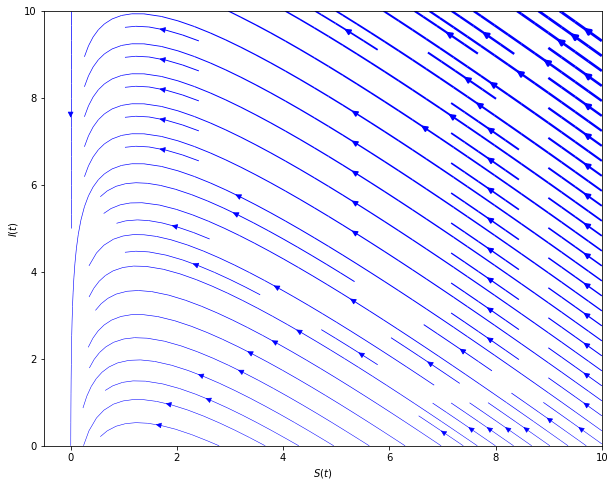

In [14]:
beta = 0.8
r = 1
args = (beta, r)

fig, ax = plt.subplots(1, 1, figsize = (10, 8))
ax.set_xlabel('$S(t)$')
ax.set_ylabel('$I(t)$')
plot_phase_plane(ax, sir2_model, (0, 10), (0, 10), args = args)

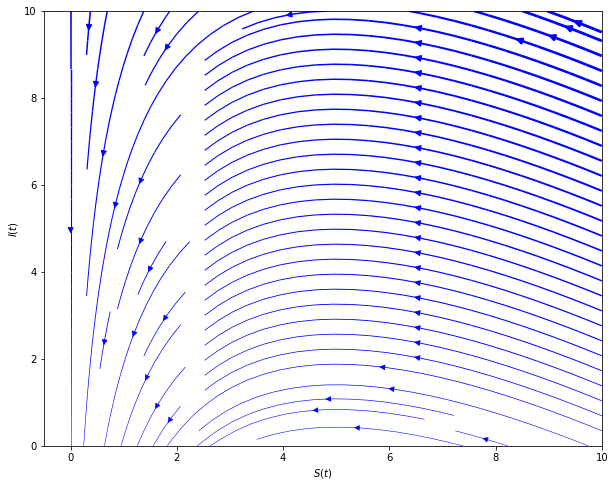

In [15]:
beta = 0.3
r = 1.5
args = (beta, r)

fig, ax = plt.subplots(1, 1, figsize = (10, 8))

ax.set_xlabel('$S(t)$')
ax.set_ylabel('$I(t)$')

plot_phase_plane(ax, sir2_model, (0, 10), (0, 10), args = args)

# C

For different combinations of r and β determine the total number
of individuals infected during an epidemic and then calculate R0 for
each parameter set. Plot the total number of infections as a function
of R0.

In [0]:
def total_number_of_infected(r0):
    beta, r = r0, 1
    args = (beta, r)
    solution = solve(sir_model, [s0, i0, r0], t, args)
    return 1 - solution[-1, 0]

In [0]:
r0s = np.linspace(0, 3, 100)
total_numbers_of_infected = [total_number_of_infected(i) for i in r0s]

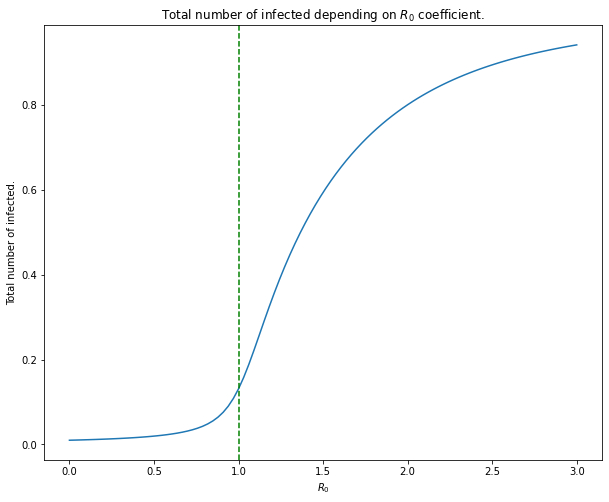

In [18]:
plt.figure(figsize = (10, 8))

plt.plot(r0s, total_numbers_of_infected)
plt.axvline(x = 1, color='green', linestyle='--')
plt.title('Total number of infected depending on $R_0$ coefficient.')
plt.xlabel('$R_0$')
plt.ylabel('Total number of infected.')

plt.show()